# **An Introduction to Clustering Algorithms in Python**
In data science, we often think about how to use data to make predictions on new data points. This is called “supervised learning.” Sometimes, however, rather than ‘making predictions’, we instead want to categorize data into buckets. This is termed “unsupervised learning.”

To illustrate the difference, let’s say we’re at a major pizza chain and we’ve been tasked with creating a feature in the order management software that will predict delivery times for customers. In order to achieve this, we are given a dataset that has delivery times, distances traveled, day of week, time of day, staff on hand, and volume of sales for several deliveries in the past. From this data, we can make predictions on future delivery times. This is a good example of supervised learning.

Now, let’s say the pizza chain wants to send out targeted coupons to customers. It wants to segment its customers into 4 groups: large families, small families, singles, and college students. We are given prior ordering data (e.g. size of order, price, frequency, etc) and we’re tasked with putting each customer into one of the four buckets. This would be an example of “unsupervised learning” since we’re not making predictions; we’re merely categorizing the customers into groups.

Clustering is one of the most frequently utilized forms of unsupervised learning. In this article, we’ll explore two of the most common forms of clustering: k-means and hierarchical.

# Understanding the K-Means Clustering Algorithm

Let’s look at how k-means clustering works. First, let me introduce you to my good friend, blobby; i.e. the make_blobs function in Python’s sci-kit learn library. We’ll create four random clusters using make_blobs to aid in our task.

(-15.0, 15.0)

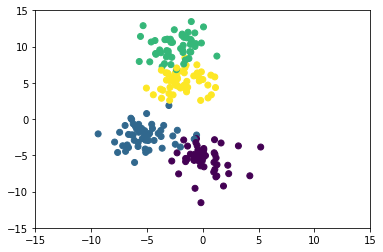

In [4]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
# create blobs 
data = make_blobs(n_samples = 200, n_features= 2, centers= 4, cluster_std=1.6, random_state=50)

# create np array for data points 
points = data[0]

# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c= data[1], cmap = 'viridis')
plt.xlim(-15,15)
plt.ylim(-15, 15)

# **Implementing K-Means Clustering in Python**

To run k-means in Python, we’ll need to import KMeans from sci-kit learn.

[[-2.40167949 10.17352695]
 [ 0.05161133 -5.35489826]
 [-1.92101646  5.21673484]
 [-5.56465793 -2.34988939]]


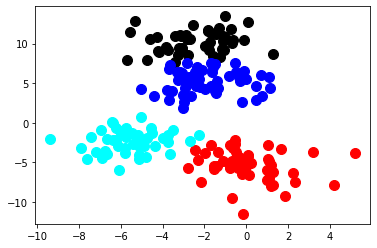

In [6]:
# import KMeans
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters =4)

# fit kmeans object to data
kmeans.fit(points)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

# save new clusters for chart 
y_km = kmeans.fit_predict(points)

#running the code in matplotlib
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')

K-means is the most frequently used form of clustering due to its speed and simplicity. Another very common clustering method is hierarchical clustering.

# Implementing Agglomerative Hierarchical Clustering

Agglomerative hierarchical clustering differs from k-means in a key way. Rather than choosing a number of clusters and starting out with random centroids, we instead begin with every point in our dataset as a “cluster.” Then we find the two closest points and combine them into a cluster. Then, we find the next closest points, and those become a cluster. We repeat the process until we only have one big giant cluster.

Along the way, we create what’s called a dendrogram. This is our “history.” You can see the dendrogram for our data points below to get a sense of what’s happening.

Let’s see how agglomerative hierarchical clustering works in Python. First, let’s import the necessary libraries from scipy.cluster.hierarchy and sklearn.clustering.

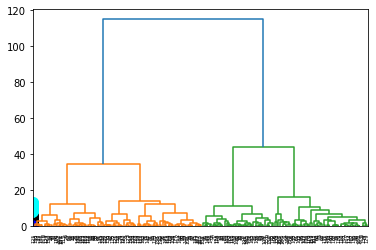

In [10]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

# save cluster for chart 
y_hc = hc.fit_predict(points)

# plot using matplotlib
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')